<a href="https://colab.research.google.com/github/chhak/DeepLearning/blob/master/tf15_auto_encoder_cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/25
이름 : 김철학
내용 : 오토인코더 활용 - 이미지 노이즈 제거
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Conv2DTranspose
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

x_train.shape

(60000, 28, 28, 1)

In [ ]:
# 노이즈 이미지 생성
x_train_random = np.random.normal(0, 1, x_train.shape)
x_test_random = np.random.normal(0, 1, x_test.shape)

train_noisy = np.clip(x_train + x_train_random * 0.4, 0.0, 1.0)
test_noisy = np.clip(x_test + x_test_random * 0.4, 0.0, 1.0)

train_noisy.shape, test_noisy.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

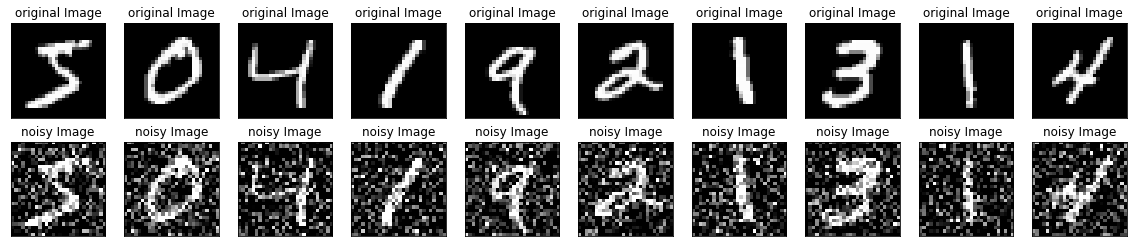

In [ ]:
# 노이즈 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # original image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(x_train[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # noisy image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('noisy Image')
  plt.imshow(train_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
# 모델구성
inputs = Input(shape=(28, 28, 1))
encoding_layout = Conv2D(filters=32, kernel_size=2, strides=2, padding='same', activation='relu')(inputs)
encoding_layout = MaxPool2D(pool_size=1, strides=2, padding='same')(encoding_layout)
encoding_layout = Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu')(encoding_layout)

decoding_layout = Conv2DTranspose(filters=32, kernel_size=2, strides=2, padding='same', activation='relu')(encoding_layout)
outs = Conv2DTranspose(filters=1, kernel_size=2, strides=2, padding='same', activation='relu')(decoding_layout)

auto_encoder = Model(inputs, outs)
auto_encoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          4128      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        4128      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         129       
Total params: 8,545
Trainable params: 8,545
Non-trainable params: 0
____________________________________________________

In [ ]:
# 모델 설정/학습하기
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_encoder.fit(train_noisy, 
                 x_train,
                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1907
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1894
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1888
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1898
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1890
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1880
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1849
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1868
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1865
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1849


In [ ]:
# 예측하기
result = auto_encoder.predict(test_noisy)
result.shape

(10000, 28, 28, 1)

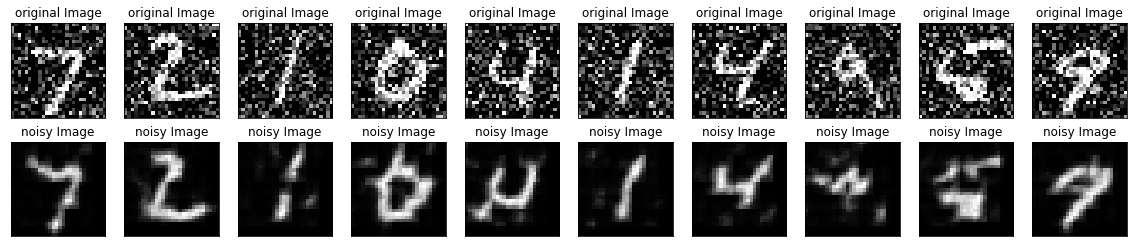

In [ ]:
# 결과 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # noisy image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('noisy Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)